In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Car%20Price.csv')

In [ ]:
df.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.describe()

,Year,Selling_Price,KM_Driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
df.corr()

,Year,Selling_Price,KM_Driven
Year,1.000000,0.413922,-0.419688
Selling_Price,0.413922,1.000000,-0.192289
KM_Driven,-0.419688,-0.192289,1.000000


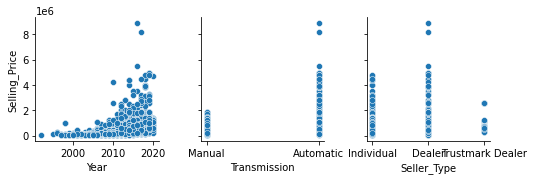

In [ ]:
sns.pairplot(df, y_vars = 'Selling_Price',x_vars = ['Year','Transmission','Seller_Type'])

In [ ]:
df['Seller_Type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: Seller_Type, dtype: int64

In [ ]:
df.replace({'Seller_Type':{'Individual':0,'Dealer':1,'Trustmark Dealer':1}},inplace=True)

In [ ]:
df['Transmission'].value_counts()

Manual       3892
Automatic     448
Name: Transmission, dtype: int64

In [ ]:
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
df['Owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: Owner, dtype: int64

In [ ]:
df.replace({'Owner':{'First Owner':0,'Second Owner':1,'Third Owner':1,'Fourth & Above Owner':1,'Test Drive Car':1}},inplace=True)

In [ ]:
df['Fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: Fuel, dtype: int64

In [ ]:
df.replace({'Fuel':{'Diesel':0,'Petrol':1,'CNG':1,'LPG':0,'Electric':0}},inplace=True)

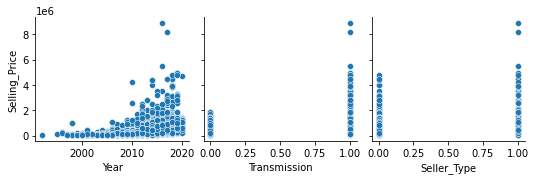

In [ ]:
sns.pairplot(df, y_vars = 'Selling_Price',x_vars = ['Year','Transmission','Seller_Type'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   int64 
 6   Seller_Type    4340 non-null   int64 
 7   Transmission   4340 non-null   int64 
 8   Owner          4340 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 305.3+ KB


In [ ]:
y=df['Selling_Price']

In [ ]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: Selling_Price, dtype: int64

In [ ]:
X=df.drop(['Brand','Model','Selling_Price'],axis=1)

In [ ]:
X.shape,y.shape

((4340, 6), (4340,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3038, 6), (1302, 6), (3038,), (1302,))

In [ ]:
X_train.describe()

,Year,KM_Driven,Fuel,Seller_Type,Transmission,Owner
count,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000
mean,2013.082291,67089.752140,0.488479,0.254115,0.102370,0.346280
std,4.133969,47932.293589,0.499950,0.435434,0.303184,0.475862
min,1992.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,35000.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,60000.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,90000.000000,1.000000,1.000000,0.000000,1.000000
max,2020.000000,806599.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler 

In [ ]:
ss = StandardScaler()

In [ ]:
X_train = ss.fit_transform(X_train)

In [ ]:
X_test = ss.fit_transform(X_test)

In [ ]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5
count,3.038000e+03,3.038000e+03,3.038000e+03,3.038000e+03,3.038000e+03,3.038000e+03
mean,-4.312109e-15,8.624511e-18,5.355967e-16,-6.162871e-16,-5.395070e-16,-1.895200e-16
std,1.000165e+00,1.000165e+00,1.000165e+00,1.000165e+00,1.000165e+00,1.000165e+00
min,-5.100609e+00,-1.399887e+00,-9.772180e-01,-5.836852e-01,-3.377051e-01,-7.278104e-01
25%,-5.037855e-01,-6.695911e-01,-9.772180e-01,-5.836852e-01,-3.377051e-01,-7.278104e-01
50%,2.220288e-01,-1.479362e-01,-9.772180e-01,-5.836852e-01,-3.377051e-01,-7.278104e-01
75%,7.059049e-01,4.780497e-01,1.023313e+00,1.713252e+00,-3.377051e-01,1.373984e+00
max,1.673657e+00,1.543074e+01,1.023313e+00,1.713252e+00,2.961163e+00,1.373984e+00


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree =2,interaction_only=True,include_bias=False)

In [ ]:
X_train2 = poly.fit_transform(X_train)
X_test2=poly.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.intercept_

499827.3485845958

In [ ]:
y_pred = lr.predict(X_test)
lr.fit(X_train2,y_train)

LinearRegression()

In [ ]:
lr.intercept_

428786.7469155726

In [ ]:
y_pred2 = lr.predict(X_test2)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
mean_absolute_error(y_test,y_pred)

237898.3076032793

In [ ]:
mean_absolute_error(y_test,y_pred2)

202769.88655557108

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.7037415744018249

In [ ]:
mean_absolute_percentage_error(y_test,y_pred2)

0.5506638715425964

In [ ]:
r2_score(y_test,y_pred)

0.45844294433344146

In [ ]:
r2_score(y_test,y_pred2)

0.6089265961255367